# Pyber Data Analysis Observations

* Out of three main city types, most of the rides(68.4%) are taken in Urban region. 
* Pyber has total 2973 drivers and most of the drivers(80.9%) are in Urban region. West Samuelburgh city has maxmium numbers of drivers(73) in all cities.
* Pyber got maximum fare(835.26) on March 19 2018 when total rides were also maximum(31), and got minimum fare(165.35)  on May 8 2018 when rides were also minium(7). 

In [71]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
combined_data = pd.merge(ride_data,city_data,how='outer', on='city')

# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

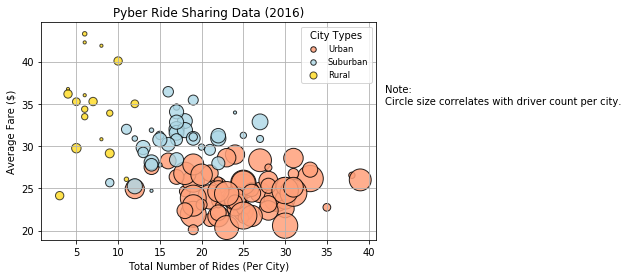

In [82]:
# Different city type 
city_types = combined_data['type'].unique()

# Obtain the x and y coordinates for each of the three city types
urban_data = combined_data.loc[combined_data['type']=='Urban',['city', 'fare', 'ride_id', 'driver_count']]
suburban_data = combined_data.loc[combined_data['type']=='Suburban',['city', 'fare', 'ride_id','driver_count']]
rural_data = combined_data.loc[combined_data['type']=='Rural',['city', 'fare', 'ride_id','driver_count']]

grouped_urban = urban_data.groupby('city').agg({'ride_id':'count',
                                              'fare':'mean', 'driver_count':'mean'}).reset_index()
grouped_suburban = suburban_data.groupby('city').agg({'ride_id':'count',
                                              'fare':'mean', 'driver_count':'mean'}).reset_index()
grouped_rural = rural_data.groupby('city').agg({'ride_id':'count',
                                              'fare':'mean', 'driver_count':'mean'}).reset_index()

# Build the scatter plots for each city types
plt.scatter(grouped_urban['ride_id'], grouped_urban['fare'], marker="o", facecolors="lightsalmon", edgecolors="black",s=grouped_urban['driver_count']*10, alpha=.85, label ='Urban', linewidths=1)
plt.scatter(grouped_suburban['ride_id'], grouped_suburban['fare'], marker="o", facecolors="lightblue", edgecolors="black",s=grouped_suburban['driver_count']*10, alpha=.80, label='Suburban', linewidths=1)
plt.scatter(grouped_rural['ride_id'], grouped_rural['fare'], marker="o", facecolors="gold", edgecolors="black",s=grouped_rural['driver_count']*10, alpha=0.7, label='Rural', linewidths=1)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
lgnd = plt.legend(loc="upper right", title='City Types', fontsize='small')

# Incorporate a text label regarding circle size
lgnd.legendHandles[0]._sizes= [30]
lgnd.legendHandles[1]._sizes= [30]

# Add outside text note
data=('Note: \n'
'Circle size correlates with driver count per city.')
plt.text(42,35,data)

# Save Figure
plt.savefig('../Images/PyberScatter.png')

# Show plot
plt.show()

## Total Fares by City Type

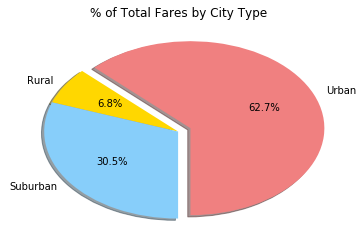

In [65]:
# Calculate Type Percents
sum_urban = urban_data['fare'].sum()
sum_suburban = suburban_data['fare'].sum()
sum_rural = rural_data['fare'].sum()
total_fare = sum_urban + sum_suburban + sum_rural

percent_urban = sum_urban*100/total_fare
percent_suburban = sum_suburban*100/total_fare
percent_rural = sum_rural*100/total_fare

labels = ['Urban', 'Rural','Suburban']
sizes = [percent_urban,percent_rural,percent_suburban]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)

plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig("../Images/FarePies.png")
# Show Figure
plt.show()


## Total Rides by City Type

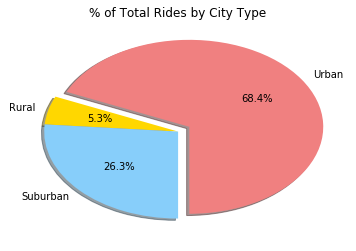

In [67]:
# Calculate Type Percents
ride_urban = urban_data['ride_id'].count()
ride_suburban = suburban_data['ride_id'].count()
ride_rural = rural_data['ride_id'].count()
total_ride = ride_urban + ride_suburban + ride_rural

percent_ride_urban = ride_urban*100/total_ride
percent_ride_suburban = ride_suburban*100/total_ride
percent_ride_rural = ride_rural*100/total_ride

labels = ['Urban', 'Rural','Suburban']
sizes = [percent_ride_urban,percent_ride_rural,percent_ride_suburban]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)

plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig("../Images/RidePies.png")
# Show Figure
plt.show()

## Total Drivers by City Type

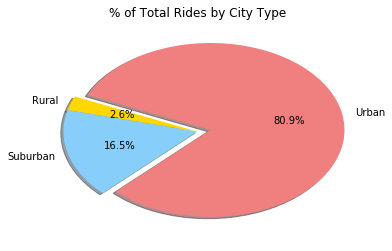

In [81]:
# Calculate Type Percents
driver_urban = city_data.loc[city_data['type'] == 'Urban',['driver_count']].sum()
driver_suburban = city_data.loc[city_data['type'] == 'Suburban',['driver_count']].sum()
driver_rural = city_data.loc[city_data['type'] == 'Rural',['driver_count']].sum()
total_driver = driver_urban + driver_suburban + driver_rural

percent_driver_urban = driver_urban*100/total_driver
percent_driver_suburban = driver_suburban*100/total_driver
percent_driver_rural = driver_rural*100/total_driver

labels = ['Urban', 'Rural','Suburban']
sizes = [percent_driver_urban,percent_driver_rural,percent_driver_suburban]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=225)

plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig("../Images/DriverPies.png")
# Show Figure
plt.show()